In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('house_price.csv')

# Show the first few rows of the data
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [8]:
# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())

# Get data types
print(df.info())


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  

In [17]:
import numpy as np

# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

# Define the threshold
threshold = 3  # Outliers beyond 3 standard deviations

# Identify outliers
outliers_mean_std = df[(df['price_per_sqft'] < mean - threshold * std_dev) | 
                       (df['price_per_sqft'] > mean + threshold * std_dev)]

# Remove outliers
df_cleaned_mean_std = df[~df['price_per_sqft'].isin(outliers_mean_std['price_per_sqft'])]


In [18]:
# Calculate the 1st and 99th percentiles
lower_percentile = df['price_per_sqft'].quantile(0.01)
upper_percentile = df['price_per_sqft'].quantile(0.99)

# Remove outliers outside of the 1st and 99th percentiles
df_cleaned_percentile = df[(df['price_per_sqft'] > lower_percentile) & 
                           (df['price_per_sqft'] < upper_percentile)]


In [11]:
# Calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned_IQR = df[(df['price_per_sqft'] >= lower_bound) & 
                    (df['price_per_sqft'] <= upper_bound)]


In [12]:
from scipy.stats import zscore

# Calculate the Z-scores
df['z_score'] = zscore(df['price_per_sqft'])

# Identify outliers
df_cleaned_zscore = df[df['z_score'].abs() <= 3]  # Outliers with z-score greater than 3 are removed


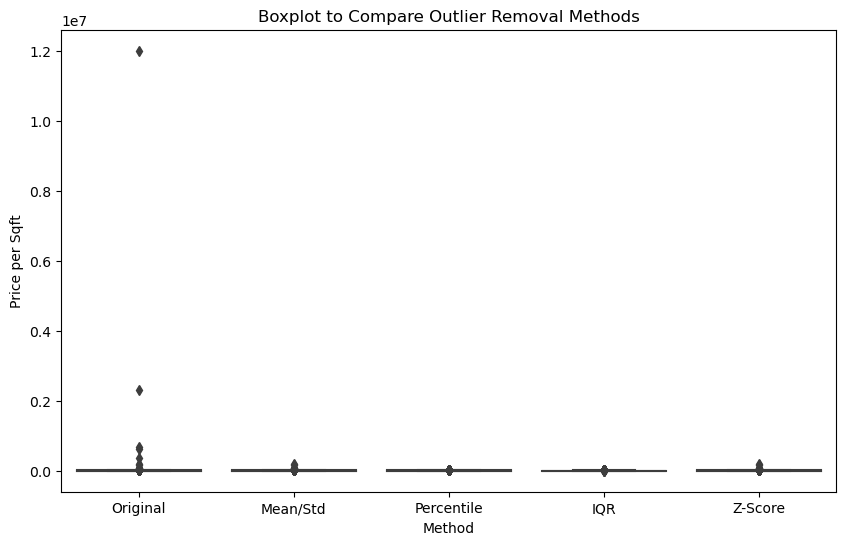

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stack the data into a single column for comparison
box_data = pd.DataFrame({
    "Original": df['price_per_sqft'],
    "Mean/Std": df_cleaned_mean_std['price_per_sqft'],
    "Percentile": df_cleaned_percentile['price_per_sqft'],
    "IQR": df_cleaned_IQR['price_per_sqft'],
    "Z-Score": df_cleaned_zscore['price_per_sqft']
})

# Create a long-format DataFrame suitable for boxplot
box_data_long = box_data.melt(var_name='Method', value_name='Price per Sqft')

# Create a boxplot to compare methods
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Price per Sqft', data=box_data_long)
plt.title("Boxplot to Compare Outlier Removal Methods")
plt.show()



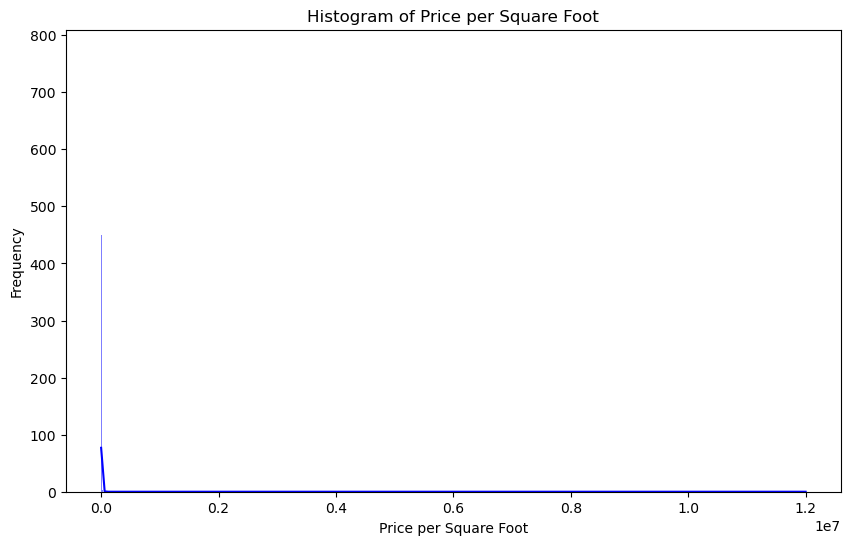

Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


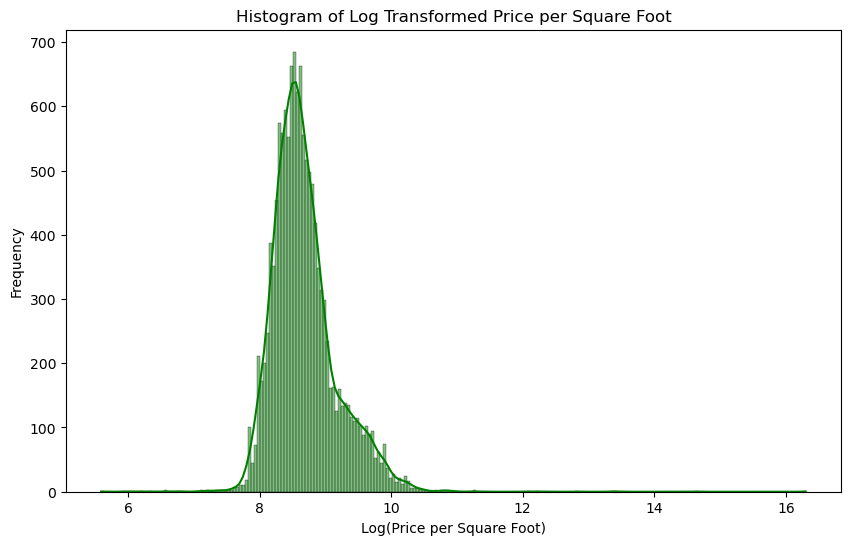

Skewness after transformation: 1.4004850530059296
Kurtosis after transformation: 9.206942162860814


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Check for NaN or infinite values and remove them
df = df[df['price_per_sqft'].notna() & (df['price_per_sqft'] != float('inf'))]

# Plot histogram to check normality of price_per_sqft column
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, color='blue')
plt.title('Histogram of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

#Check skewness and kurtosis before transformation
skewness_before = df['price_per_sqft'].skew()
kurtosis_before = df['price_per_sqft'].kurt()
print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")


# Log transformation (adding 1 to avoid log(0))
df['log_price_per_sqft'] = np.log(df['price_per_sqft'] + 1)

#  Plot histogram for log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price_per_sqft'], kde=True, color='green')
plt.title('Histogram of Log Transformed Price per Square Foot')
plt.xlabel('Log(Price per Square Foot)')
plt.ylabel('Frequency')
plt.show()

# Check skewness and kurtosis after log transformation
skewness_after = df['log_price_per_sqft'].skew()
kurtosis_after = df['log_price_per_sqft'].kurt()
print(f"Skewness after transformation: {skewness_after}")
print(f"Kurtosis after transformation: {kurtosis_after}")


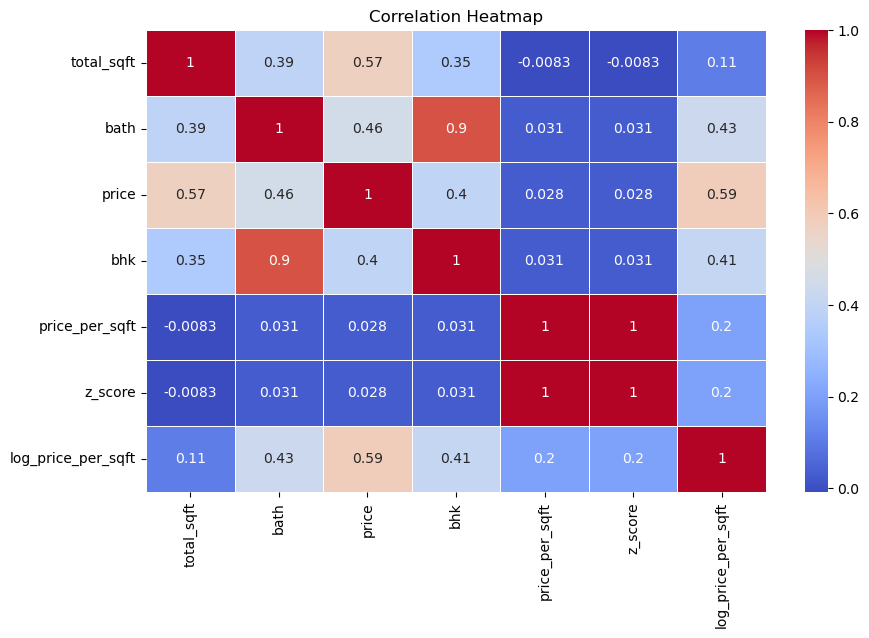

KeyError: 'area'

<Figure size 1000x600 with 0 Axes>

In [15]:
# Q5: Check correlation between all numerical columns and plot heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Q6: Draw scatter plot between numerical variables to check correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price_per_sqft'], color='orange')
plt.title('Scatter Plot: Area vs Price per Square Foot')
plt.xlabel('Area')
plt.ylabel('Price per Square Foot')
plt.show()